# Inteligencja Obliczeniowa w Analizie danych cyfrowych

## Lab 1. EasyAI - Integracja niederministycznej wersji gry NIM i analiza algorytmów.

### Miłosz Góralczyk

## I. Raport z laboratorium

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Gra na której przeprowadziłem ekperyment wydajności, prędkości, oraz implementacji AI jest Grą Nim.

Gra polega na rozpoczęciu rozgrywki z n stosami, każdy zawierającą pewną ilość patyków, zapałek.

Gracze na zmianę zdejmują jedną lub więcej zapałek z jednego ze stosów

Gracz który zdejmie ostatnią zapałke - przegrywa



Wariant gry - Nimby.

Zgodnie z instrukcją, zaimplementowany niederministyczna wersja algorytmu posiada 10% szans na modyfikację wykonanego ruchu, wprowadza element losowości i pozwala na niespodziewaną wygraną nawet w najgorszym momencie.

Symulacje zostały przeprowadzone dla dwóch głębokości, 

1. AI z głębokością 11 vs AI z głębokością 9
2. AI z  głębokością 6 vs AI z głębokością 8

## Zad 1. Implementacja niedeterministycznego algorytmu, porównanie obu wersji dla dwóch głębokości

Dla każdego ustawienia zostały przeprowadzone 20 gry.

Ta liczba została taka ama w zadaniu 2 i 3. 

Dzięki temu można było pozyskać próbkę na tyle wysoką by zaobserwować wzory w danych

Wyniki zostały zapisane i wpisane do dataframe'a df1 dla zadania 1, df2 dla zadania 2, df3 dla zadania 3

### Wykres wygranych w zależności od gracza rozpoczynającego

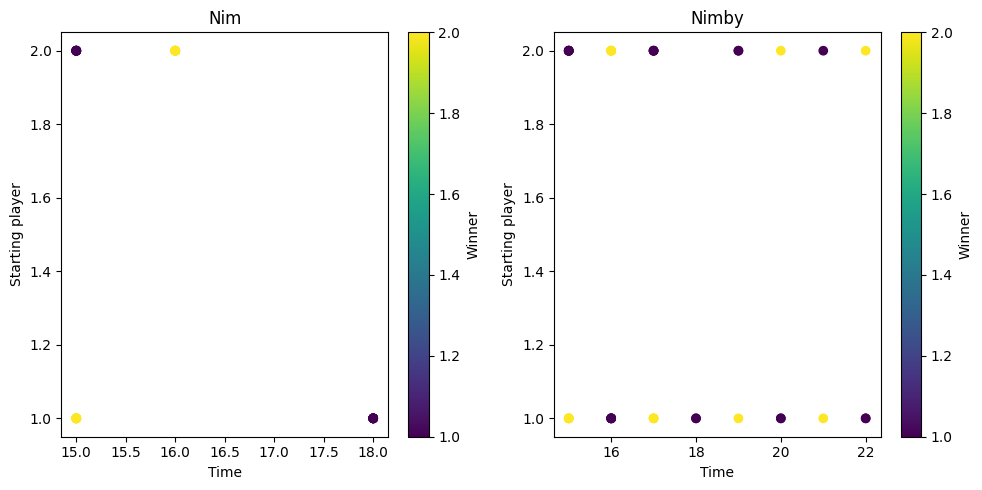

In [126]:
# plotting the data for Nim and Nimby. Winner vs starting player on time x axis

df1_nim = df1[df1['game_variant'] == 'Nim']
df1_nimby = df1[df1['game_variant'] == 'Nimby']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Nim')
plt.scatter(df1_nim['time'], df1_nim['starting_player'], c=df1_nim['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Time')
plt.ylabel('Starting player')

plt.subplot(1, 2, 2)
plt.title('Nimby')
plt.scatter(df1_nimby['time'], df1_nimby['starting_player'], c=df1_nimby['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Time')
plt.ylabel('Starting player')

plt.tight_layout()
plt.show()

### Wykres wygranych w zależności od czasu i liczby rund

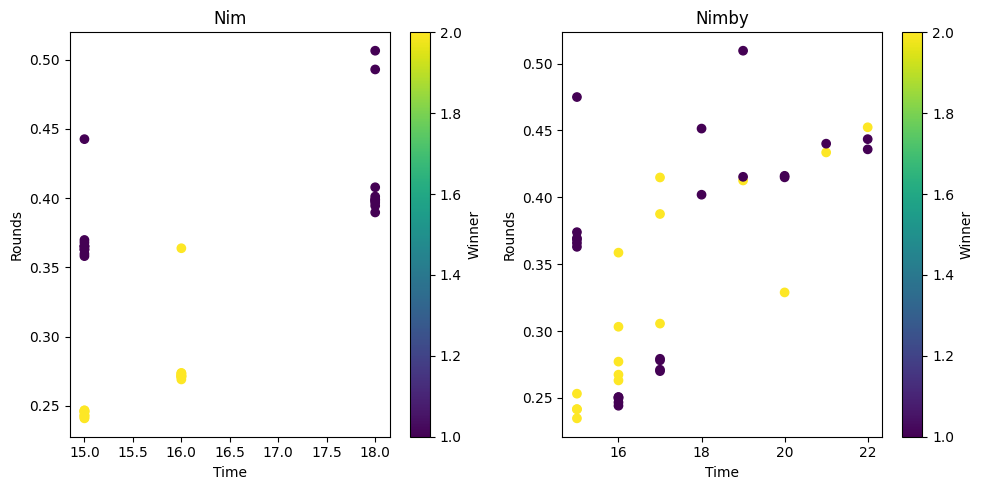

In [127]:
# plotting the data for Nim and Nimby. Winner vs rounds on time x axis

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Nim')
plt.scatter(df1_nim['time'], df1_nim['rounds'], c=df1_nim['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Time')
plt.ylabel('Rounds')

plt.subplot(1, 2, 2)
plt.title('Nimby')
plt.scatter(df1_nimby['time'], df1_nimby['rounds'], c=df1_nimby['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Time')
plt.ylabel('Rounds')

plt.tight_layout()
plt.show()



## Zad 2. Porównanie No pruning vs pruning negamax

Odcinanie gałęzi alfa-beta polega na nie braniu pod uwagę tych gałęzi drzewa wyboru, grze Expected Value przy danej głębokości spadnie poniżej wartości alfa 

Tym samym wartość dla gracza przeciwnego wzrośnie powyżej wartości beta

Poprzez zaimplementowanie braku potrzeby obliczania do końca drzew złych decyzji, można znacząco poprawić czas podejmowania decyzji i obliczeń optymalnego ruchu.

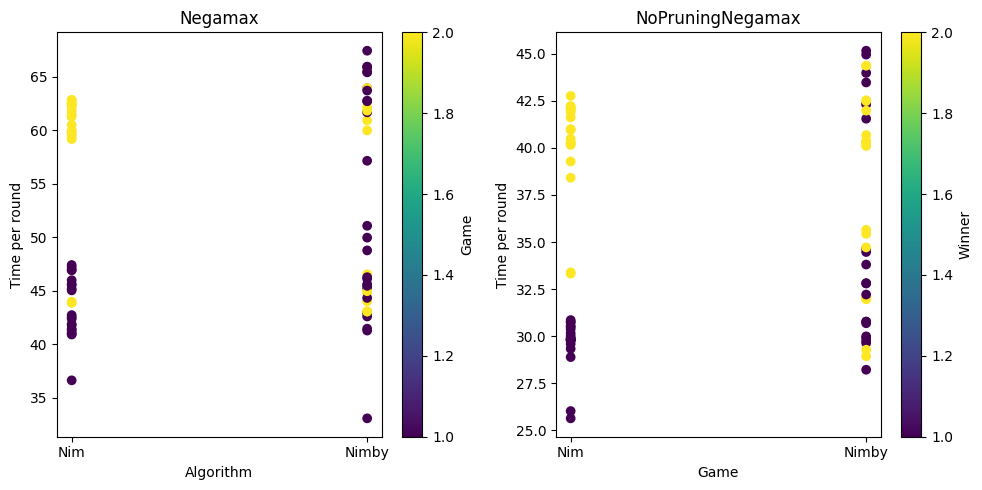

In [137]:

#time per round by algorithm

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Negamax')
plt.scatter(df2_negamax['game_variant'],df2_negamax['time']/ df2_negamax['rounds'], c=df2_negamax['winner'], cmap='viridis')
plt.colorbar(label='Game')
plt.xlabel('Algorithm')
plt.ylabel('Time per round')

plt.subplot(1, 2, 2)
plt.title('NoPruningNegamax')
plt.scatter(df2_noprune['game_variant'],df2_noprune['time']/ df2_noprune['rounds'], c=df2_noprune['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Game')
plt.ylabel('Time per round')

plt.tight_layout()
plt.show()


In [149]:
avg_time_per_round_negamax = df2_negamax['rounds'].sum() / df2_negamax['time'].sum()
avg_time_per_round_noprune = df2_noprune['rounds'].sum() / df2_noprune['time'].sum()

print('Average time per round for Negamax: ', avg_time_per_round_negamax)
print('Average time per round for NoPruningNegamax: ', avg_time_per_round_noprune)

Average time per round for Negamax:  0.019822072045464226
Average time per round for NoPruningNegamax:  0.02828156467275529


Jak widać, czas algorytmu bez obcięcia jest około 50% wyższy niż z obcięciem alfa-beta

### Zad 3. Implementacja algorytmu ExpectiMiniMax z odcięciem Alfa Beta i porównanie czasów

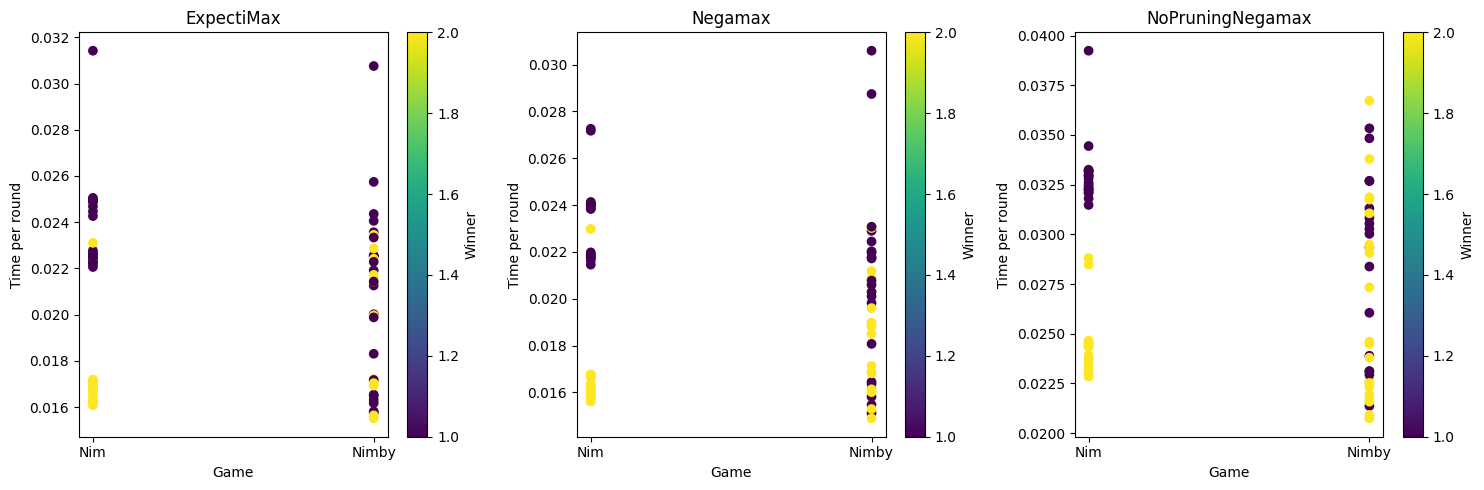

In [145]:
# compare the time per round for ExpectiMax, Negamax and NoPruningNegamax

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('ExpectiMax')
plt.scatter(df3_expectimax['game_variant'],df3_expectimax['rounds']/ df3_expectimax['time'], c=df3_expectimax['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Game')
plt.ylabel('Time per round')

plt.subplot(1, 3, 2)
plt.title('Negamax')
plt.scatter(df3_negamax['game_variant'],df3_negamax['rounds']/ df3_negamax['time'], c=df3_negamax['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Game')
plt.ylabel('Time per round')

plt.subplot(1, 3, 3)
plt.title('NoPruningNegamax')
plt.scatter(df3_noprune['game_variant'],df3_noprune['rounds']/ df3_noprune['time'], c=df3_noprune['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Game')
plt.ylabel('Time per round')

plt.tight_layout()
plt.show()

### średni czas nawykonanie ruchu

In [148]:
avg_time_per_round_negamax = df3_negamax['rounds'].mean() / df3_negamax['time'].mean()
avg_time_per_round_noprune = df3_noprune['rounds'].mean() / df3_noprune['time'].mean()
avg_time_per_round_expectimax = df3_expectimax['rounds'].mean() / df3_expectimax['time'].mean()

print(f'Average time per round for Negamax: {avg_time_per_round_negamax}, NoPruningNegamax: {avg_time_per_round_noprune}, ExpectiMax: {avg_time_per_round_expectimax}')

Average time per round for Negamax: 0.01983281510264535, NoPruningNegamax: 0.027429368240935136, ExpectiMax: 0.020365474757271934


Średni czas ruchu:
1. Negamax z odcięciem - 0.019s
2. Negamax bez odcięcia- 0.027s
3. ExpectiMax z odcięciem - 0.02s 

Jak widać, zaimplementowany algorytm Exoecti-minimax z odcięciem alfa-beta czasowo wypada bardzo podobnie do algorytmu Negamax z tym odcięciem.

Algorytm Negamax bez odcięcia jest około 40% wolniejsza od obu wcześniejszych wariantów

### Całkowta liczba wygranych graczy

Number of games: 240


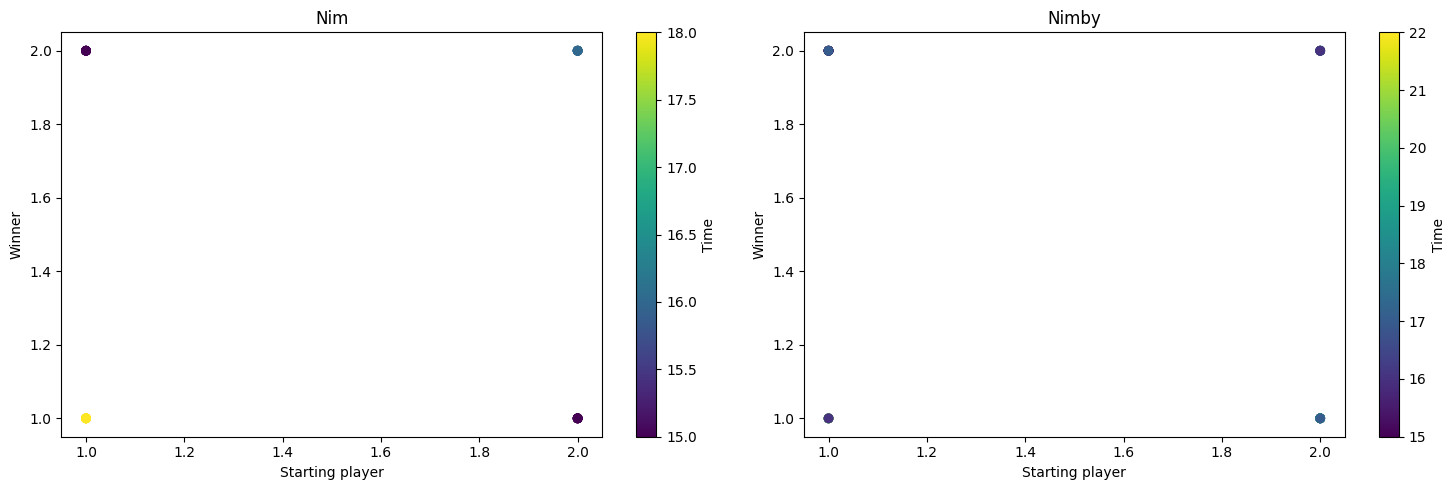

In [34]:
total_games = df3.shape[0]

print(f'Number of games: {total_games}')

# compare the winnners for games in Nim and Nimby

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Nim')
plt.scatter(df1_nim['starting_player'],df1_nim['winner'], c=df1_nim['time'], cmap='viridis')
plt.colorbar(label='Time')
plt.xlabel('Starting player')
plt.ylabel('Winner')

plt.subplot(1, 2, 2)
plt.title('Nimby')
plt.scatter(df1_nimby['starting_player'],df1_nimby['winner'], c=df1_nimby['time'], cmap='viridis')
plt.colorbar(label='Time')
plt.xlabel('Starting player')
plt.ylabel('Winner')

plt.tight_layout()
plt.show()





In [35]:
player_1_wins = df3[df3['winner'] == 1].shape[0]
player_2_wins = df3[df3['winner'] == 2].shape[0]
print(f'Player 1 wins: {player_1_wins}, Player 2 wins: {player_2_wins}')

Player 1 wins: 118, Player 2 wins: 122


Wygrane są dosyć zrównoważone, z uwagi na fakt, że w ustawieniu głębokości 11;9 player1 miał przewagę 2 iteracji wgłąb drzewa, podobnie jak w ustawieniu głębokości 6;8 player 2 miał taką samą przewagę

Gracz 1 wygrał 49% rozgrywek, a Gracz 2 51%

## Wnioski

1. Głębokość

Głębokość algorytmu przeszukiwania najlepszego wyniku znacząco wpływa na wynik wygranej. 
Gracz AI z odpowiednio wysokim parametrem głębokości (tu: 14) wygra w deterministycznym wariancie rozgrywki za każdym razem.

Przy głębokościach 6/8 gracz drugi wygrał 84% rozgrywek.

Przy głębokościach 11/9 gracz pierwszy wygrał 75% rozgrywek.


2. Determinizm

Wprowadzenie elementu losowości znacząco wpływa na wyniki, dając szansę najgorzej myślącemu graczowi wygrać z najlepszym przeciwnikiem

W momencie rozgrywki dwóch algorytmów z wysokim parametrem głębokości, wszystko zależy od tego komu ostatniemu nadarzy się trefny ruch 

W wariancie niederministycznym, liczba wygranych między konkurującymi graczami AI była zdecydowanie bardziej zbalansowana niż w deterministycznych rozgrywkach


3. Algorytmy, Odcinanie Alfa-Beta

Wprowadzenie, lub pozbycie się z algorytmu odcinania gałęzi wpływa znacząco na czas podjęcia decyzji. 

Już w tym małym eksperymencie, przy głębokościach 11/9, usunięcie odcinania z Negamaxa wydłużyło czas podjęcia decyzji i wykonania ruchu o około 50%

4. Algorytmy, wariant Expecti-minimax i wydajność

Zaimplementowana wariancja algorytmu Expecti-minimax, rozszerzona o odcinanie alfa-beta, w wynikach czasowych zachowuje się prawie że dokładnie jak Negamax z odcinaniem

Zaobserwowana różnica w czasie wyników jest mniejsza niż 1% (0.0198s vs 0.020s)



## II. Kod źródłowy laboratorium, generowanie danych do dataframe'ów

### 1. Importy biblotek ogólnych

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

Import oraz Implementacja zmodyfikowanych potrzebnych klas EasyAI

In [3]:
from easyAI.games import Nim
from easyAI import AI_Player, Negamax, TwoPlayerGame, solve_with_iterative_deepening
from easyAI.AI import TranspositionTable



class Nimby(Nim):
    WRONG_MOVE_CHANCE= 0.1
    def make_move(self, move: str) -> None:
        where, count = tuple(map(int, move.split(",")))
        #   Added randomness as described in the task
        if Nimby.WRONG_MOVE_CHANCE >= random.random():
            remove = count - 1
        else:
            remove = count

        self.piles[where - 1] -= remove

def ask_move_modified(self, game):
    original_make_move = game.make_move
    game.make_move = Nim.make_move.__get__(game, Nim)
    move = self.AI_algo(game)
    game.make_move = original_make_move
    
    return move

ask_move_original = AI_Player.ask_move
AI_Player.ask_move = ask_move_modified

Przetestowanie gry AI - AI

Wersja niedeterministyczna

AI z głębokością 5 vs AI z głębokością 6

In [4]:
ai1= Negamax(5, tt=TranspositionTable())
ai2= Negamax(6, tt=TranspositionTable())


for _ in range(10):
    nimby = Nimby([AI_Player(ai1), AI_Player(ai2)])
    nimby.play()
    print(f'Wygrana:gracz nr {nimby.current_player}, liczba ruchów: {nimby.nmove}')

Wygrana:gracz nr 2, liczba ruchów: 22
Wygrana:gracz nr 1, liczba ruchów: 21
Wygrana:gracz nr 1, liczba ruchów: 25
Wygrana:gracz nr 1, liczba ruchów: 23
Wygrana:gracz nr 2, liczba ruchów: 22
Wygrana:gracz nr 2, liczba ruchów: 20
Wygrana:gracz nr 1, liczba ruchów: 23
Wygrana:gracz nr 1, liczba ruchów: 21
Wygrana:gracz nr 1, liczba ruchów: 21
Wygrana:gracz nr 2, liczba ruchów: 22


### Utworzenie dataframe do przechowywania danych z gier

Kolumny: Rodzaj rozgrwki, głębokość, zaczynający, czas, rundy, czas na rundę

In [5]:
df = pd.DataFrame(columns=['game_variant', 'algorithm', 'depths','rounds', 'time', 'starting_player', 'winner' ])

### Algorytm Negamax

Wersja deterministyczna. Tworzymy tablicę transpozycji i 'rozwiązujemy' grę. W wersji deterministycznej dla każdego ułożenia istnieje 'winning strategy'. Wystarczy obliczyć jak się zachować w każdej pozycji i gracz zaczynający zawsze wygra rozgrywkę

In [6]:
trans_table= TranspositionTable()
w, d, m = solve_with_iterative_deepening(Nim(), range(1, 20), win_score=80, tt=trans_table)
w, d, m, len(trans_table.d)

d:1, a:0, m:1,1
d:2, a:0, m:1,1
d:3, a:0, m:1,1
d:4, a:0, m:1,1
d:5, a:0, m:1,1
d:6, a:0, m:1,1
d:7, a:0, m:1,1
d:8, a:0, m:1,1
d:9, a:0, m:1,1
d:10, a:0, m:1,1
d:11, a:0, m:1,1
d:12, a:0, m:1,1
d:13, a:0, m:1,1
d:14, a:-100, m:1,1


(-1, 14, '1,1', 1100)

### Utworzenie funkcji do przeprowadzenia rozgrywek

In [7]:
from time import perf_counter

type DepthConfiguration = tuple[int, int]
type DataframeRecord = tuple[str, str, np.array, np.uint8, np.uint8, float, np.uint8]

def run_game(*, game_type, solving_algorithm, in_order, **kwargs):
    def play_game(depths: DepthConfiguration) -> DataframeRecord:
        player1_depth, player2_depth = depths
        ai_1 = solving_algorithm(depth=player1_depth, tt=TranspositionTable())
        ai_2 = solving_algorithm(depth=player2_depth, tt=TranspositionTable())
        game_config = {
            'players': [
                AI_Player(ai_1),
                AI_Player(ai_2)
            ],
        } | kwargs
        
        environment = game_type(**game_config)
        
        if not in_order:
            environment.switch_player()
    
        starting_player: int = environment.current_player
    
        start= perf_counter()
        history= environment.play()
        end= perf_counter()

        output= str(game_type.__name__), str(solving_algorithm.__name__), np.asarray(depths), end - start, np.uint8(len(history) - 1), np.uint8(starting_player),  np.uint8(environment.current_player)

        print(
            'game_variant={}, solving_algorithm={} depths={}, time={}s, rounds={}, starting_player={}, winner={}'.format(
                *output
            )
        )
        return output
    
    return play_game

def add_to_dataframe(data, records):
    for record in records:
        data.loc[len(data)] = record

In [8]:
depths_nim = [
    (9,7),
    (5, 8),
]

results= map(run_game(game_type=Nim, solving_algorithm=Negamax, in_order=True), depths_nim)
add_to_dataframe(df, list(results))

game_variant=Nim, solving_algorithm=Negamax depths=[9 7], time=0.29739750000044296s, rounds=14, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=Negamax depths=[5 8], time=0.21295669999926758s, rounds=15, starting_player=1, winner=2


In [9]:
df

,game_variant,algorithm,depths,rounds,time,starting_player,winner
0,Nim,Negamax,"[9, 7]",0.297398,14,1,1
1,Nim,Negamax,"[5, 8]",0.212957,15,1,2


In [10]:
### Zad 1. 

In [11]:
df1 = pd.DataFrame(columns=['game_variant', 'algorithm', 'depths','rounds', 'time', 'starting_player', 'winner' ])

depths1 = [(11, 9)]
depths2 = [(6,8)]



In [12]:
ITERATIONS = 20

In [13]:
iterations = ITERATIONS

# Nim and Nimby, depth1 and depth2

# 1. Nim, depth1

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=Negamax, in_order=order), depths1)
    add_to_dataframe(df1, list(results))

# 2. Nim, depth2

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=Negamax, in_order=order), depths2)
    add_to_dataframe(df1, list(results))

# 3. Nimby, depth1

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=Negamax, in_order=order), depths1)
    add_to_dataframe(df1, list(results))

# 4. Nimby, depth2

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=Negamax, in_order=order), depths2)
    add_to_dataframe(df1, list(results))

    

game_variant=Nim, solving_algorithm=Negamax depths=[11  9], time=0.3619300000009389s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=Negamax depths=[11  9], time=0.3972871000005398s, rounds=18, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=Negamax depths=[11  9], time=0.3662650999995094s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=Negamax depths=[11  9], time=0.4144332999985636s, rounds=18, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=Negamax depths=[11  9], time=0.3689926999995805s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=Negamax depths=[11  9], time=0.4021511000009923s, rounds=18, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=Negamax depths=[11  9], time=0.3713497999997344s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=Negamax depths=[11  9], time=0.4871104000012565s, rounds=18, starting_player=1, winner=1


In [14]:
df1

,game_variant,algorithm,depths,rounds,time,starting_player,winner
0,Nim,Negamax,"[11, 9]",0.361930,15,2,1
1,Nim,Negamax,"[11, 9]",0.397287,18,1,1
2,Nim,Negamax,"[11, 9]",0.366265,15,2,1
3,Nim,Negamax,"[11, 9]",0.414433,18,1,1
4,Nim,Negamax,"[11, 9]",0.368993,15,2,1
...,...,...,...,...,...,...,...
75,Nimby,Negamax,"[6, 8]",0.239878,16,1,1
76,Nimby,Negamax,"[6, 8]",0.256744,16,2,2
77,Nimby,Negamax,"[6, 8]",0.254925,17,1,2
78,Nimby,Negamax,"[6, 8]",0.266920,17,2,1


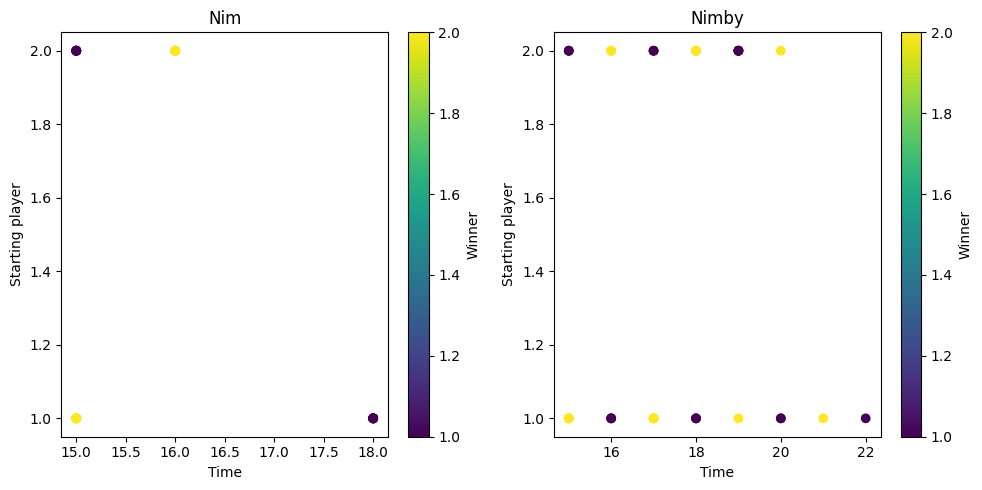

In [15]:
# plotting the data for Nim and Nimby. Winner vs starting player on time x axis

df1_nim = df1[df1['game_variant'] == 'Nim']
df1_nimby = df1[df1['game_variant'] == 'Nimby']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Nim')
plt.scatter(df1_nim['time'], df1_nim['starting_player'], c=df1_nim['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Time')
plt.ylabel('Starting player')

plt.subplot(1, 2, 2)
plt.title('Nimby')
plt.scatter(df1_nimby['time'], df1_nimby['starting_player'], c=df1_nimby['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Time')
plt.ylabel('Starting player')

plt.tight_layout()
plt.show()

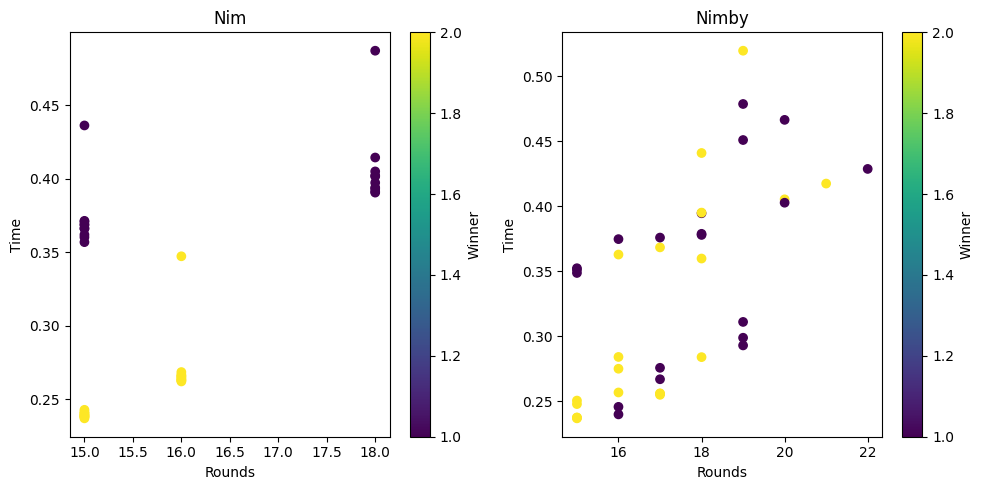

In [16]:
# plotting the data for Nim and Nimby. Winner vs rounds on time x axis

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Nim')
plt.scatter(df1_nim['time'], df1_nim['rounds'], c=df1_nim['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Rounds')
plt.ylabel('Time')

plt.subplot(1, 2, 2)
plt.title('Nimby')
plt.scatter(df1_nimby['time'], df1_nimby['rounds'], c=df1_nimby['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Rounds')
plt.ylabel('Time')

plt.tight_layout()
plt.show()



### Zad 2. Porównanie algorytmów

In [17]:
from easyAI.AI.Negamax import inf

class NoPruningNegamax:

    def __init__(self, depth: int, scoring = None, tt= None) :
        self.depth: int = depth
        self.scoring = scoring
        self.tt = tt

    def __call__(self, game: TwoPlayerGame) -> str:
        """
        Returns the AI's best move given the current state of the game.
        """

        scoring = (
            self.scoring if self.scoring else (lambda g: g.scoring())
        )  # horrible hack

        self.alpha = NoPruningNegamax.no_pruning_negamax(
            game,
            self.depth,
            self.depth,
            scoring,
            self.tt,
        )
        return game.ai_move # To jest dynamicznie dawana zmienna do obiektu klasy, bez konsultacji z faktyczną klasą gry. Rozwiązanie twórcy "easyAI" XD
    
    @staticmethod
    def no_pruning_negamax(game: TwoPlayerGame, depth: int, original_depth: int, scoring, tt= None):
        """
		This implements Negamax with transposition tables.
		This method is not meant to be used directly. See ``easyAI.Negamax``
		for an example of practical use.
		This function is implemented (almost) according to
		http://en.wikipedia.org/wiki/Negamax
		"""
    
        # Is there a transposition table and is this game in it ?
        lookup = None if (tt is None) else tt.lookup(game)
    
        if lookup is not None:
            # The game has been visited in the past
    
            if lookup["depth"] >= depth:
                value = lookup["value"]
                if depth == original_depth:
                    game.ai_move = lookup["move"]
                return value
    
        if (depth == 0) or game.is_over():
            # NOTE: the "depth" variable represents the depth left to recurse into,
            # so the smaller it is, the deeper we are in the negamax recursion.
            # Here we add 0.001 as a bonus to signify that victories in less turns
            # have more value than victories in many turns (and conversely, defeats
            # after many turns are preferred over defeats in less turns)
            return scoring(game) * (1 + 0.001 * depth)
    
        if lookup is not None:
            # Put the supposedly best move first in the list
            possible_moves = game.possible_moves()
            possible_moves.remove(lookup["move"])
            possible_moves = [lookup["move"]] + possible_moves
    
        else:
            possible_moves = game.possible_moves()
    
        state = game
        best_move = possible_moves[0]
        if depth == original_depth:
            state.ai_move = possible_moves[0]
    
        best_value = -inf
        unmake_move = hasattr(state, "unmake_move")
    
        for move in possible_moves:
    
            if not unmake_move:
                game = state.copy()  # re-initialize move
    
            game.make_move(move)
            game.switch_player()
    
            move_score = -NoPruningNegamax.no_pruning_negamax(game, depth - 1, original_depth, scoring, tt)
    
            if unmake_move:
                game.switch_player()
                game.unmake_move(move)
    
            # bestValue = max( bestValue,  move_score )
            if best_value < move_score:
                best_value = move_score
                best_move = move
                if depth == original_depth:
                    state.ai_move = move
    
        if tt is not None:
    
            assert best_move in possible_moves
            tt.store(
                game=state,
                depth=depth,
                value=best_value,
                move=best_move,
            )
    
        return best_value


In [18]:
df2 = pd.DataFrame(columns=['game_variant', 'algorithm', 'depths','rounds', 'time', 'starting_player', 'winner' ])

In [19]:
import random
# 1. Nim, depth1, NoPruningNegamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=NoPruningNegamax, in_order=order), depths1)
    add_to_dataframe(df2, list(results))

# 2. Nim, depth2, NoPruningNegamax
    
for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=NoPruningNegamax, in_order=order), depths2)
    add_to_dataframe(df2, list(results))

# 3. Nimby, depth1, NoPruningNegamax
    
for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=NoPruningNegamax, in_order=order), depths1)
    add_to_dataframe(df2, list(results))

# 4. Nimby, depth2, NoPruningNegamax
    
for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=NoPruningNegamax, in_order=order), depths2)
    add_to_dataframe(df2, list(results))

#5. Nim, depth1, Negamax
    
for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=Negamax, in_order=order), depths1)
    add_to_dataframe(df2, list(results))

#6. Nim, depth2, Negamax
    
for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=Negamax, in_order=order), depths2)
    add_to_dataframe(df2, list(results))

#7. Nimby, depth1, Negamax
    
for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=Negamax, in_order=order), depths1)
    add_to_dataframe(df2, list(results))

#8. Nimby, depth2, Negamax
    
for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=Negamax, in_order=order), depths2)
    add_to_dataframe(df2, list(results))


game_variant=Nim, solving_algorithm=NoPruningNegamax depths=[11  9], time=0.5082010999994964s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=NoPruningNegamax depths=[11  9], time=0.5214068999994197s, rounds=16, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=NoPruningNegamax depths=[11  9], time=0.5030449999994744s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=NoPruningNegamax depths=[11  9], time=0.5168044000001828s, rounds=16, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=NoPruningNegamax depths=[11  9], time=0.5026084999990417s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=NoPruningNegamax depths=[11  9], time=0.5373856000005617s, rounds=16, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=NoPruningNegamax depths=[11  9], time=0.5065033999999287s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=NoPruningNegamax depths=[1

In [20]:
df2_nim = df2[df2['game_variant'] == 'Nim']
df2_nimby = df2[df2['game_variant'] == 'Nimby']

df2_negamax = df2[df2['algorithm'] == 'Negamax']
df2_noprune = df2[df2['algorithm'] == 'NoPruningNegamax']

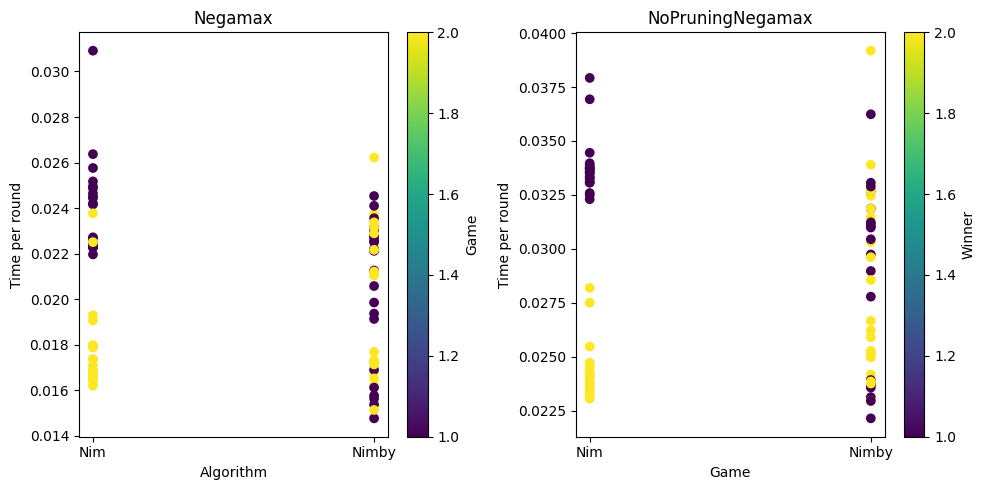

In [21]:
#time per round by algorithm

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Negamax')
plt.scatter(df2_negamax['game_variant'],df2_negamax['rounds']/ df2_negamax['time'], c=df2_negamax['winner'], cmap='viridis')
plt.colorbar(label='Game')
plt.xlabel('Algorithm')
plt.ylabel('Time per round')

plt.subplot(1, 2, 2)
plt.title('NoPruningNegamax')
plt.scatter(df2_noprune['game_variant'],df2_noprune['rounds']/ df2_noprune['time'], c=df2_noprune['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Game')
plt.ylabel('Time per round')

plt.tight_layout()
plt.show()


### 3. Expect-minimax

In [22]:
"""
The standard AI algorithm of easyAI is Negamax with alpha-beta pruning
and (optionally), transposition tables.
"""

LOWERBOUND, EXACT, UPPERBOUND = -1, 0, 1


def expectiMax(game, depth, origDepth, scoring, alpha=+inf, beta=-inf, tt=None):
    """
    This implements Negamax with transposition tables.
    This method is not meant to be used directly. See ``easyAI.Negamax``
    for an example of practical use.
    This function is implemented (almost) according to
    http://en.wikipedia.org/wiki/Negamax
    """

    alphaOrig = alpha

    # Is there a transposition table and is this game in it ?
    lookup = None if (tt is None) else tt.lookup(game)

    if lookup is not None:
        # The game has been visited in the past

        if lookup["depth"] >= depth:
            flag, value = lookup["flag"], lookup["value"]
            if flag == EXACT:
                if depth == origDepth:
                    game.ai_move = lookup["move"]
                return value
            elif flag == LOWERBOUND:
                alpha = max(alpha, value)
            elif flag == UPPERBOUND:
                beta = min(beta, value)

            if alpha >= beta:
                if depth == origDepth:
                    game.ai_move = lookup["move"]
                return value

    if (depth == 0) or game.is_over():
        # NOTE: the "depth" variable represents the depth left to recurse into,
        # so the smaller it is, the deeper we are in the negamax recursion.
        # Here we add 0.001 as a bonus to signify that victories in less turns
        # have more value than victories in many turns (and conversely, defeats
        # after many turns are preferred over defeats in less turns)
        return scoring(game) * (1 + 0.001 * depth)

    if lookup is not None:
        # Put the supposedly best move first in the list
        possible_moves = game.possible_moves()
        possible_moves.remove(lookup["move"])
        possible_moves = [lookup["move"]] + possible_moves

    else:

        possible_moves = game.possible_moves()

    state = game
    best_move = possible_moves[0]
    if depth == origDepth:
        state.ai_move = possible_moves[0]

    bestValue = -inf
    unmake_move = hasattr(state, "unmake_move")

    for move in possible_moves:

        if not unmake_move:
            game = state.copy()  # re-initialize move

        game.make_move(move)
        game.switch_player()

        move_alpha = -expectiMax(game, depth - 1, origDepth, scoring, -beta, -alpha, tt)

        if unmake_move:
            game.switch_player()
            game.unmake_move(move)

        # bestValue = max( bestValue,  move_alpha )
        if bestValue < move_alpha:
            bestValue = move_alpha
            best_move = move

        if alpha < move_alpha:
            alpha = move_alpha
            # best_move = move
            if depth == origDepth:
                state.ai_move = move
            if alpha >= beta:
                break

    if tt is not None:

        assert best_move in possible_moves
        tt.store(
            game=state,
            depth=depth,
            value=bestValue,
            move=best_move,
            flag=UPPERBOUND
            if (bestValue <= alphaOrig)
            else (LOWERBOUND if (bestValue >= beta) else EXACT),
        )

    return bestValue


class ExpectiMax:
    """
    This implements Negamax on steroids. The following example shows
    how to set up the AI and play a Connect Four game:

        >>> from easyAI.games import ConnectFour
        >>> from easyAI import Negamax, Human_Player, AI_Player
        >>> scoring = lambda game: -100 if game.lose() else 0
        >>> ai_algo = Negamax(8, scoring) # AI will think 8 turns in advance
        >>> game = ConnectFour([Human_Player(), AI_Player(ai_algo)])
        >>> game.play()

    Parameters
    -----------

    depth:
      How many moves in advance should the AI think ?
      (2 moves = 1 complete turn)

    scoring:
      A function f(game)-> score. If no scoring is provided
         and the game object has a ``scoring`` method it will be used.

    win_score:
      Score above which the score means a win. This will be
        used to speed up computations if provided, but the AI will not
        differentiate quick defeats from long-fought ones (see next
        section).

    tt:
      A transposition table (a table storing game states and moves)
      scoring: can be none if the game that the AI will be given has a
      ``scoring`` method.

    Notes
    -----

    The score of a given game is given by

    >>> scoring(current_game) - 0.01*sign*current_depth

    for instance if a loss is -100 points, then losing after 4 moves
    will score -99.96 points but losing after 8 moves will be -99.92
    points. Thus, the AI will choose the move that leads to defeat in
    8 turns, which makes it more difficult for the (human) opponent.
    This will not always work if a ``win_score`` argument is provided.

    """

    def __init__(self, depth: int, scoring=None, win_score=+inf, tt=None):
        self.scoring = scoring
        self.depth: int = depth
        self.tt = tt
        self.win_score = win_score

    def __call__(self, game):
        """
        Returns the AI's best move given the current state of the game.
        """

        scoring = (
            self.scoring if self.scoring else (lambda g: g.scoring())
        )  # horrible hack

        self.alpha = expectiMax(
            game,
            self.depth,
            self.depth,
            scoring,
            -self.win_score,
            +self.win_score,
            self.tt,
        )
        return game.ai_move


In [23]:
df3 = pd.DataFrame(columns=['game_variant', 'algorithm', 'depths','rounds', 'time', 'starting_player', 'winner' ])

In [24]:
# ExpectiMax, NoPruningNegamax, Negamax; Nim, Nimby; depth1, depth2. 12 variants

# 1. Nim, depth1, ExpectiMax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=ExpectiMax, in_order=order), depths1)
    add_to_dataframe(df3, list(results))

# 2. Nim, depth2, ExpectiMax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=ExpectiMax, in_order=order), depths2)
    add_to_dataframe(df3, list(results))

# 3. Nimby, depth1, ExpectiMax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=ExpectiMax, in_order=order), depths1)
    add_to_dataframe(df3, list(results))

# 4. Nimby, depth2, ExpectiMax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=ExpectiMax, in_order=order), depths2)
    add_to_dataframe(df3, list(results))

# 5. Nim, depth1, NoPruningNegamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=NoPruningNegamax, in_order=order), depths1)
    add_to_dataframe(df3, list(results))

# 6. Nim, depth2, NoPruningNegamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=NoPruningNegamax, in_order=order), depths2)
    add_to_dataframe(df3, list(results))

# 7. Nimby, depth1, NoPruningNegamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=NoPruningNegamax, in_order=order), depths1)
    add_to_dataframe(df3, list(results))

# 8. Nimby, depth2, NoPruningNegamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=NoPruningNegamax, in_order=order), depths2)
    add_to_dataframe(df3, list(results))

# 9. Nim, depth1, Negamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=Negamax, in_order=order), depths1)
    add_to_dataframe(df3, list(results))

# 10. Nim, depth2, Negamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nim, solving_algorithm=Negamax, in_order=order), depths2)
    add_to_dataframe(df3, list(results))

# 11. Nimby, depth1, Negamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=Negamax, in_order=order), depths1)
    add_to_dataframe(df3, list(results))

# 12. Nimby, depth2, Negamax

for _ in range(iterations):
    order = _ % 2
    results = map(run_game(game_type=Nimby, solving_algorithm=Negamax, in_order=order), depths2)
    add_to_dataframe(df3, list(results))


game_variant=Nim, solving_algorithm=ExpectiMax depths=[11  9], time=0.37041519999911543s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=ExpectiMax depths=[11  9], time=0.40021039999919594s, rounds=18, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=ExpectiMax depths=[11  9], time=0.357042999999976s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=ExpectiMax depths=[11  9], time=0.4861756999998761s, rounds=18, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=ExpectiMax depths=[11  9], time=0.3587262000000919s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=ExpectiMax depths=[11  9], time=0.3864314000002196s, rounds=18, starting_player=1, winner=1
game_variant=Nim, solving_algorithm=ExpectiMax depths=[11  9], time=0.35243269999955373s, rounds=15, starting_player=2, winner=1
game_variant=Nim, solving_algorithm=ExpectiMax depths=[11  9], time=0.3827896000002511s, rounds=18, st

In [25]:
df3

,game_variant,algorithm,depths,rounds,time,starting_player,winner
0,Nim,ExpectiMax,"[11, 9]",0.370415,15,2,1
1,Nim,ExpectiMax,"[11, 9]",0.400210,18,1,1
2,Nim,ExpectiMax,"[11, 9]",0.357043,15,2,1
3,Nim,ExpectiMax,"[11, 9]",0.486176,18,1,1
4,Nim,ExpectiMax,"[11, 9]",0.358726,15,2,1
...,...,...,...,...,...,...,...
235,Nimby,Negamax,"[6, 8]",0.263432,17,1,2
236,Nimby,Negamax,"[6, 8]",0.285574,17,2,1
237,Nimby,Negamax,"[6, 8]",0.258208,15,1,2
238,Nimby,Negamax,"[6, 8]",0.280651,17,2,1


In [26]:
df3_nim = df3[df3['game_variant'] == 'Nim']
df3_nimby = df3[df3['game_variant'] == 'Nimby']

df3_negamax = df3[df3['algorithm'] == 'Negamax']
df3_noprune = df3[df3['algorithm'] == 'NoPruningNegamax']
df3_expectimax = df3[df3['algorithm'] == 'ExpectiMax']

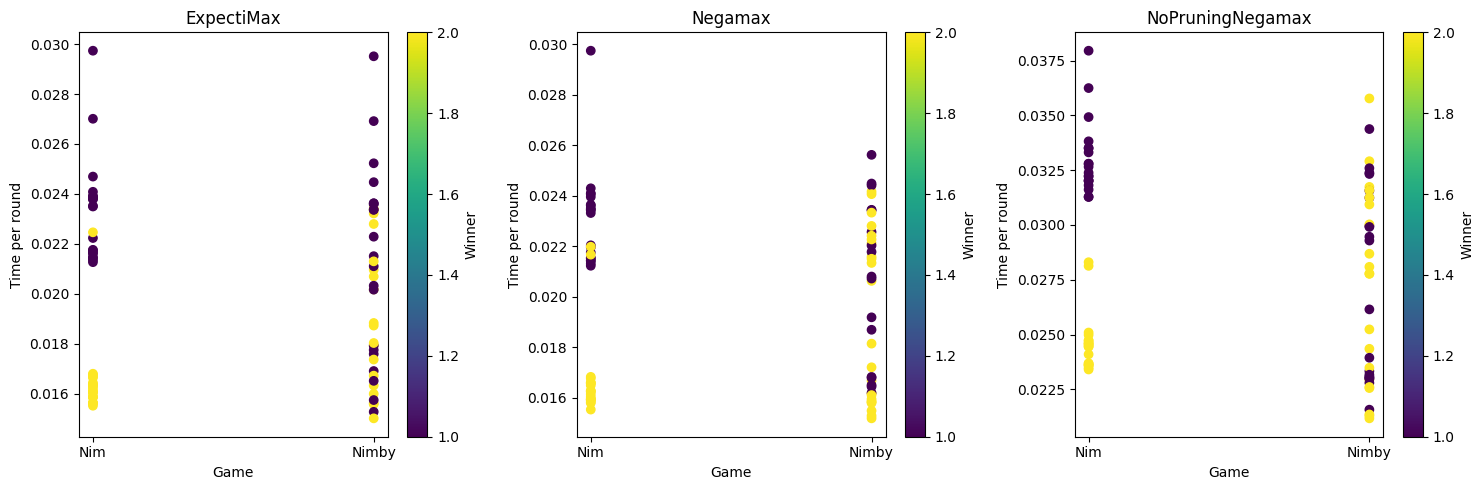

In [27]:
# compare the time per round for ExpectiMax, Negamax and NoPruningNegamax

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('ExpectiMax')
plt.scatter(df3_expectimax['game_variant'],df3_expectimax['rounds']/ df3_expectimax['time'], c=df3_expectimax['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Game')
plt.ylabel('Time per round')

plt.subplot(1, 3, 2)
plt.title('Negamax')
plt.scatter(df3_negamax['game_variant'],df3_negamax['rounds']/ df3_negamax['time'], c=df3_negamax['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Game')
plt.ylabel('Time per round')

plt.subplot(1, 3, 3)
plt.title('NoPruningNegamax')
plt.scatter(df3_noprune['game_variant'],df3_noprune['rounds']/ df3_noprune['time'], c=df3_noprune['winner'], cmap='viridis')
plt.colorbar(label='Winner')
plt.xlabel('Game')
plt.ylabel('Time per round')

plt.tight_layout()
plt.show()

In [ ]:
# count the winners for each game variant

total_games = df3.shape[0]

print(f'Number of games: {total_games}')

games_won_in_nim = df3_nim[df3_nim['winner'] == 1].shape[0]
games_won_in_nimby = df3_nimby[df3_nimby['winner'] == 1].shape[0]

In [28]:
# save to csv

df1.to_csv('df1.csv')
df2.to_csv('df2.csv')
df3.to_csv('df3.csv')